# 第31讲 插值及其应用数值微分与积分


## 插值算法编程步骤：

1. 导入插值算法包

```from scipy import interpolate  as intp```

其中有函数

```dfitpack,fitpack, fitpack2,griddata, insert,interp1d, interp2d,interpn, interpnd, interpolate,  make_interp_spline, make_lsq_spline, pade, pchip, test
```

2. 准备(实验)采样数据t0,y0
3. 创建插值函数intf=iptp.interp1d(t0,y0,kind='linear')
4. 计算插值位置(即自变量采样)ts=np.linspace(a,b,n)
5. 计算插值函数值ys=intf(ts)
6. 图示插值数据
7. 应用插值数据

插值算法编程举例1：假想有一组接近sine函数的实验数据(t0,y0)：

注意对于interp家族，计算的自变量插值点 必须在自变量测量范围之内。

scipy.interpolate.interp2d 与scipy.interpolate.interp1d类似，但是是用于2-D数组。

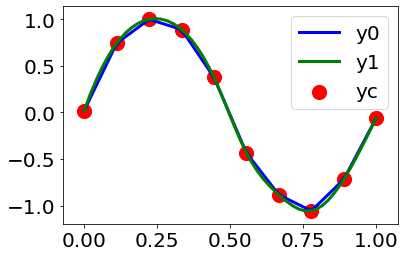

In [7]:
#encoding=gb2312
import numpy as np;
from scipy import interpolate  as intp
from matplotlib import pyplot as plt;

t0 = np.linspace(0, 1, 10);#自变量实验数据
no= (np.random.random(10)*2 - 1) * 1e-1
y0 = np.sin(2 * npp.pi * t0) + no#函数实验数据

intf = intp.interp1d(t0,y0,kind='linear')#建立一个一维线性插值函数
intcf = intp.interp1d(t0,y0,kind='cubic')#建立一个一维立方插值函数

t1 = np.linspace(0, 1, 50);

y1 =intf (t1)#计算插值
yc = intcf(t1)#计算立方插值

plt.close();
plt.rcParams['font.size']=20
plt.scatter(t0,y0,200,color='r',marker='o');
plt.plot(t1,y1, 'b-',t1,yc,'g-',lw=3)
plt.legend(['y0', 'y1', 'yc']);
plt.show()

## 插值算法应用实例2——周期梯形波信号采样与频谱分析

f= [   0.          333.33333333  666.66666667 1333.33333333 1666.66666667
 2333.33333333 2666.66666667]
A= [6.664      4.56285354 1.14307683 0.28859953 0.18544272 0.09697601
 0.0741885 ]
phi= [ 0.         -3.14159265 -3.14159265  3.14159265  3.14159265 -3.14159265
 -3.14159265]


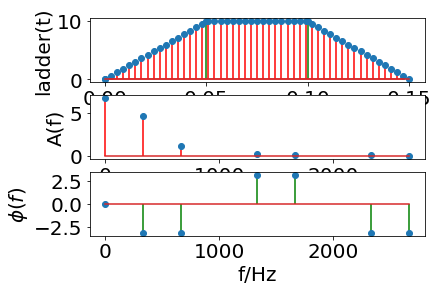

In [14]:
#encoding=gb2312
import numpy as np
from matplotlib import pyplot as plt
from scipy import interpolate  as intp
from scipy.fftpack import fft


t0=0.05*npp.array([0,1,2,3]);  ##定义信号关键时间位置

T=t0[-1]-t0[0]   ##定义信号周期

s0=10*npp.array([0,1,1,0]) ##定义关键位置的取值

intf=intp.interp1d(t0,s0) ##对信号进行插值——构造插值函数

n=50;    #一个周期内采样数
nh=n//2;
dt=T/n;   #采样步长
F=1/dt;   #采样频率

ts=npp.linspace(0,T-dt,n); ##定义时间上的采样时刻

ss=intf(ts)  ##根据构造的插值函数，计算时间点上的函数取值

plt.rcParams['font.size']=20

plt.subplot(311)

plt.stem(ts,ss,'r-',use_line_collection=True)

plt.stem(t0,s0,'g-',use_line_collection=True)

plt.xlabel('t/sec');
plt.ylabel('ladder(t)')

Y=2*fft(ss)/n;
Yh=Y[:nh];
Y[0]/=2

A=np.abs(Yh);

phi=np.angle(Yh)

f=np.arange(nh)*F

Am=A.max();

flag=A>0.01*Am

fout=f[flag];
Aout=A[flag]

phiout=phi[flag];

print('f=',f[flag])

print('A=',A[flag])
print('phi=',phi[flag])

plt.subplot(312)
plt.stem(fout,Aout,'r-',use_line_collection=True)
plt.ylabel('A(f)')
plt.subplot(313);
plt.stem(fout,phiout,'g-',use_line_collection=True)
plt.xlabel('f/Hz');pl.ylabel(r'$\phi(f)$')
plt.show()

# 用函数采样数据直接计算数值微分与数值积分


对于定义在区间[a,b]上的函数 y=f(x)，

如果对自变量x采样给出xs=np.linspace(a,b,n)，

则函数采样ys=f(xs)。

## 函数在xs[k]处的一阶微分可以定义为 

```
dy[k]=ys[k]-ys[k-1]=ys[k+1]-ys[k]=(ys[k+1]-ys[k-1])/2  (k=1,2,...n-2),

dy[0]=(-3ys[0]+4ys[1]-ys[2])/2    

dy[n-1]=(ys[n-3]-4ys[n-2]+3ys[n-1])/2

```

## 函数在xs[k]处的二阶微分可以定义为 

```
d2y[k]=ys[k+1]-2ys[k]+ys[k-1]    (k=1,2,...n-2)

d2y[0]=2ys[0]-5ys[1]+4ys[2]-ys[3]

d2y[n-1]=-ys[n-4]+4ys[n-3]-5ys[n-2]+2ys[n-1]

```
## 函数的数值积分定义为
```
inty=sum(ys[:-1])*dx=sum(ys[1:])*dx=(sum(ys[1:-1])+(ys[0]+ys[n-1])/2)*dx,  dx=(b-a)/(n-1)
```

## 依据上述原理我们给出计算一阶微分二阶微分的Python程序和定积分Python程序


1.  Python扩展包( 模块)numpy函数diff可用来求函数的一阶微分，它的定义是```d1y=diff(ys)=ys[1:]-ys[:-1]```存在的问题是：计算后数据减少了一个。

2. 自定义一、二阶微分计算函数mydiff

In [34]:
def  mydiff(ys,order=1):
    '''
    给出order阶微分,ys是函数采样
    例如  mydiff(ys,order=2)
    '''
    wf=ys.copy()
    if order==1:   ##一阶微分
            if len(ys)<3:
                print('len(ys)<3,error!');
                return 0
            wf[1:-1]=(ys[2:]-ys[:-2])/2
            wf[0]=(-3*ys[0]+4*ys[1]-ys[2])/2
            wf[-1]=(ys[-3]-4*ys[-2]+3*ys[-1])/2
    else:   ##二阶微分
            if len(ys)<4:
                print('len(ys)<4,error !')
                return 0
            wf[1:-1]=ys[2:]-2*ys[1:-1]+ys[:-2]
            wf[0]=2*ys[0]-5*ys[1]+4*ys[2]-ys[3]
            wf[-1]=-ys[-4] +4*ys[-3]-5*ys[-2] +2*ys[-1]
            
    return wf

## 3. 函数的数值导数计算方法

```
xs=np.linspace(a,b,n);   h=x[1]-x[0];  ys=f(xs);  yps=mydiff(ys)/h;  ypps=mydiff(yps)/h
```
### 4. 数值积分python程序

数值积分有两种情况：

  ### (1) 定积分：即积分区间[a,b]确定
  
```s=h*ys[:-1].sum()```
    
   ### (2) 积分下限给定为a,积分上限u可变,u位于[a,b]上。
   
   对于这两种情况，我们编写如下自定义积分函数：


In [42]:
def myintegrate(ys, dx=0.01, mode=1):
    '''mode=1,数值积分,       mode=0,累加积分,      dx 是自变量采样间隔'''
    if mode:
        s = ys[1:-1].sum()+(ys[0]+ys[-1])/2
    else:
        s = ys.cumsum()
    return dx*s

## 数值导数与数值积分编程示例：

研究函数$f(x)=x*np.sin(x)*np.exp(-0.5*x)$,在区间[0,10]上的一阶、二阶导数和积分，并图示。

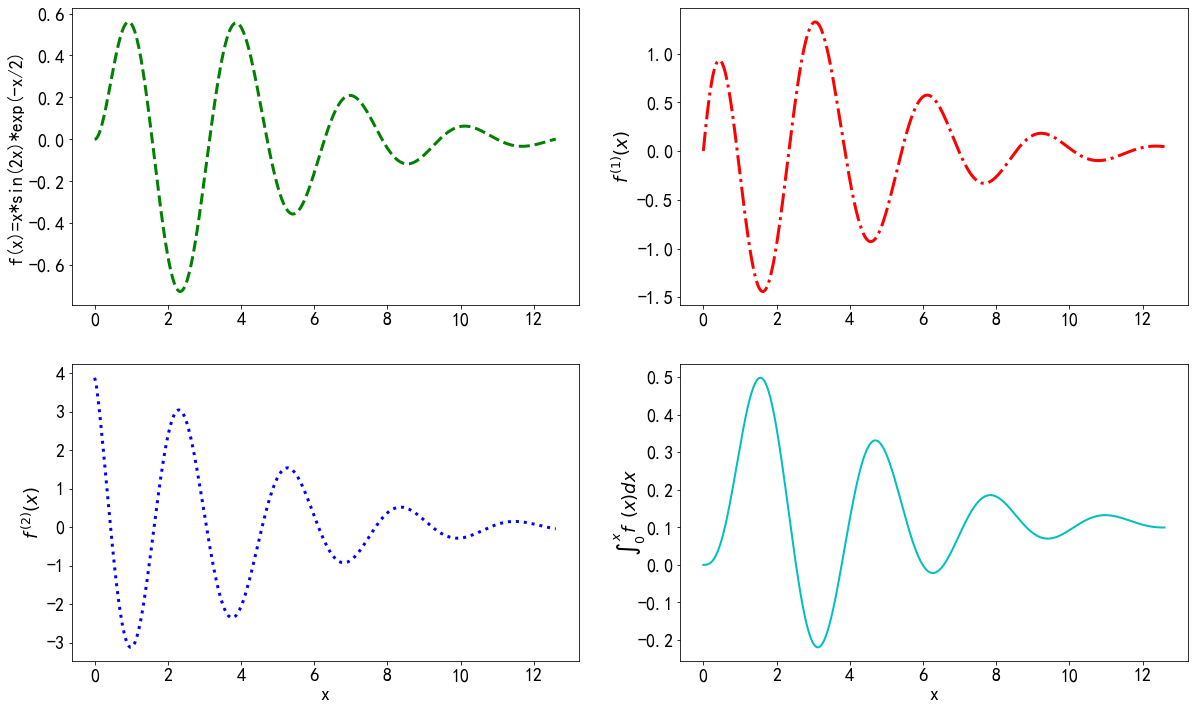

In [32]:
import pylab as pl;
import numpy as np


xs=np.linspace(0,12.6,501);

ys=np.sin(2*xs)*np.exp(-0.5*xs)*xs

h=xs[1]-xs[0]

yps=mydiff(ys)/h

ypps=mydiff(yps)/h

intys=ys.cumsum()*h

pl.rcParams['font.sans-serif']=['KaiTi']
pl.rcParams['font.size']=18
pl.rcParams['axes.unicode_minus']=False

pl.close()
pl.figure(figsize=(20,12))
pl.subplot(221);
pl.plot(xs,ys,'g--',lw=3);
pl.ylabel('f(x)=x*sin(2x)*exp(-x/2)')

pl.subplot(222);
pl.plot(xs,yps,'r-.',lw=3)
pl.ylabel(r'$f\thinspace^{(1)}(x)$')

pl.subplot(223);
pl.plot(xs,ypps,'b:',lw=3);
pl.ylabel(r'$f\thinspace^{ (2)}(x)$');
pl.xlabel('x');

pl.subplot(224);
pl.plot(xs,intys,'c',lw=2);
st=r'$\int^{x}_0f\enspace(x)dx$'
pl.ylabel(st,labelpad=-10);
pl.xlabel('x');

pl.show()


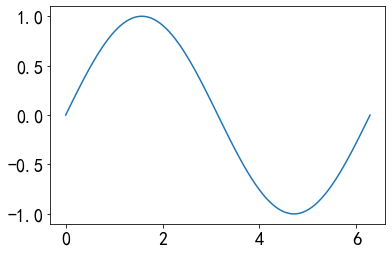

In [46]:
import numpy as np
import matplotlib.pyplot as plt

xs=np.linspace(0,2*np.pi,101);
ys=np.sin(xs)



plt.plot(xs,ys)